## 1.Kütüphaneler


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")


## 2. Veri setini yükle


<font size="10">

1. Fashion MNIST Veri Kümesinin Tanımlanması: TensorFlow Keras modülünden Fashion MNIST veri kümesini fashion_mnist adında bir değişkene atıyoruz.

2. Veri Kümesinin Yüklenmesi ve Ayırılması: fashion_mnist.load_data() fonksiyonuyla veri kümesini yüklüyoruz ve eğitim/test verileri ile etiketlerini X_train, y_train, X_test, y_test değişkenlerine ayırıyoruz.

</font>

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
## X_train, eğitim verilerinin sayısını, boyutlarını verir
X_train.shape

(60000, 28, 28)

In [ ]:
## y_train, eğitim verilerinin sayısını verir.
y_train.shape

(60000,)

In [ ]:
## X_test, test verilerinin sayısını, boyutlarını verir

X_test.shape

(10000, 28, 28)

Veri setinde toplamda 50.000 adet eğitim görüntüsü ve 10.000 adet test görüntüsü bulunmaktadır.
Her bir görüntü, 28x28 piksel boyutundadır ve siyah-beyazdır.

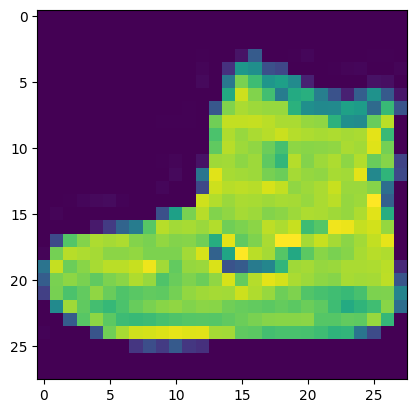

In [ ]:
# Verileri görselleştirelim (rastgele)
plt.figure()  # Yeni bir grafik figürü oluşturur.
plt.imshow(X_train[0])  # Eğitim verilerinden rastgele bir görüntüyü görselleştirir.
# plt.colorbar()  # Renk skalasını ekler, bu durumda görüntü siyah-beyaz olduğu için etkisizdir.
plt.grid(False)  # Izgara çizgilerini kaldırır.
plt.show()  # Grafiği gösterir.


Ayakkabıya benzeyen bir görsel yakaladık.  0 siyah, 255 beyaz ve aradaki değerler gri tonlarını temsil eder. Eksenler piksel numaralarını gösterir.

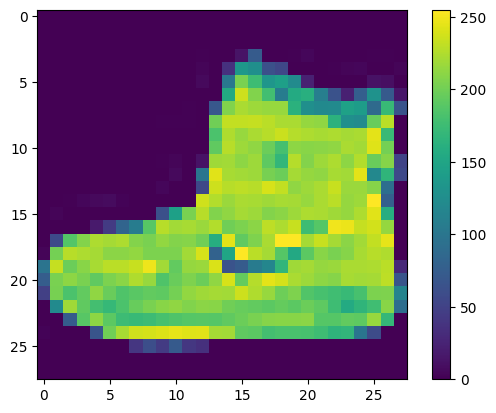

In [ ]:
## Verileri görselleştirelim(rastgele)

plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Yukarıda görüldüğü gibi colorbar() bizim veri setimiz için etkisizdir.

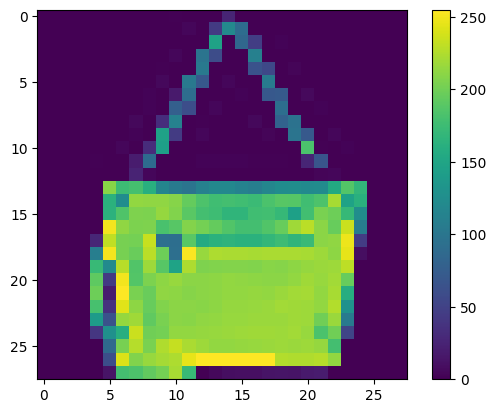

In [ ]:
## Verileri görselleştirelim(rastgele)

plt.figure()
plt.imshow(X_train[214])
plt.colorbar()
plt.grid(False)
plt.show()

Çantaya benzeyen bir görsel.

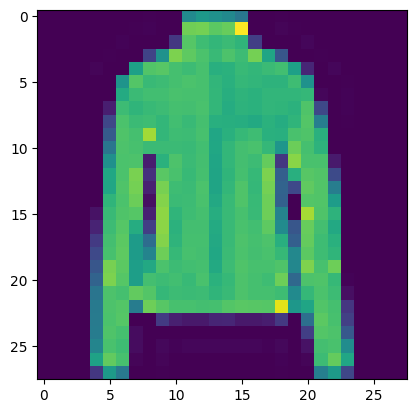

In [ ]:
## Verileri görselleştirelim(rastgele)

plt.figure()
plt.imshow(X_test[1234])
#plt.colorbar()
plt.grid(False)
plt.show()

Ve son olarak cekete benzeyen bir görsel.

## 3. Verileri Normalleştirelim

 Görüntü pikselleri 0-255 aralığında değerler alır. Bu aralıktaki maksimum değeri 255'tir.

 Bu aralığı 0-1 arasına sıkıştırmak için her piksel değerini 255'e böleriz, böylece normalleştirilmiş piksel değerleri 0.0 ile 1.0 arasında olur.

In [ ]:
# Verileri 0-1 arasına sıkıştıralım

X_train = X_train / 255.0

X_test = X_test / 255.0

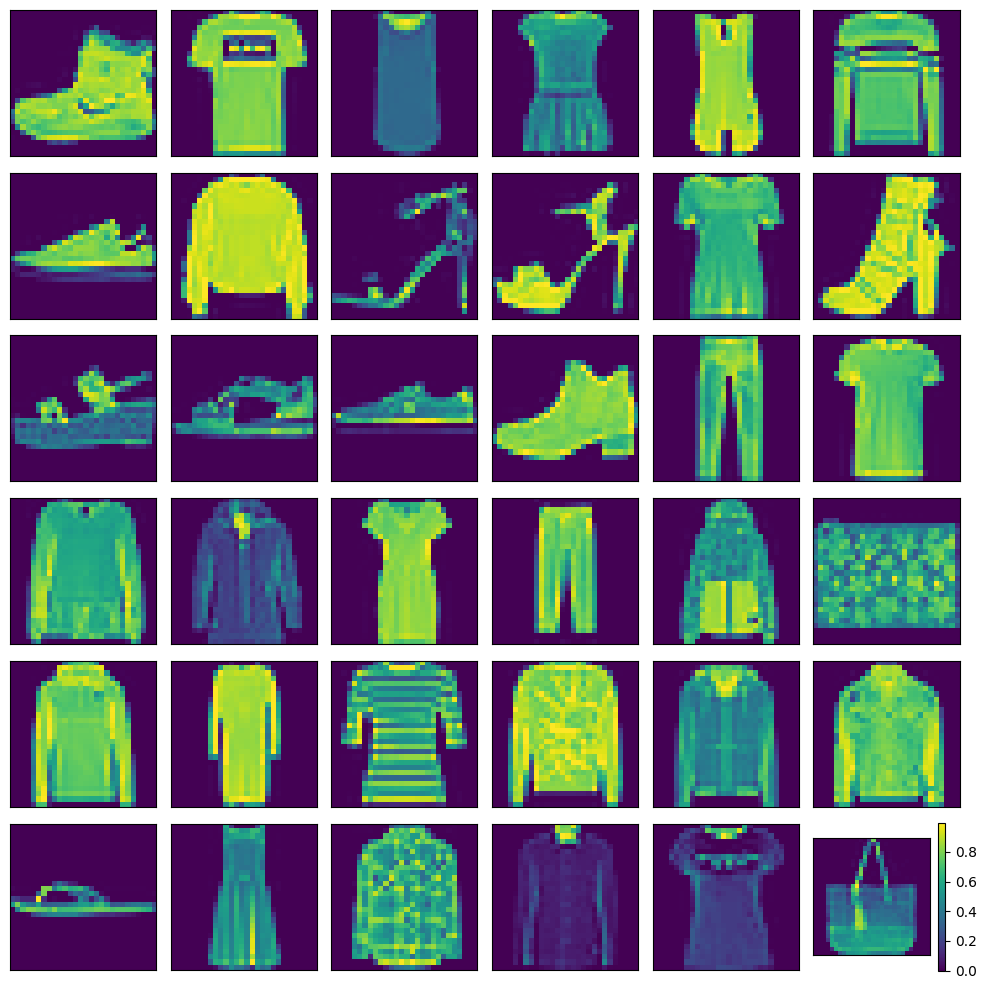

In [ ]:
## 30 görüntüyü görselleştirelim

plt.figure(figsize=(10,10))

for i in range(36): #0'dan 29'a kadar olan (toplamda 30) sayılar üzerinde dönen bir döngü başlatır.
    plt.subplot(6,6,i+1) # 6 satır, 5 sutun, 1. elemandan başlattık.
    plt.xticks([]) #Bu iki satır, x ve y eksenlerindeki işaretlemeleri (ticks) gizler
    plt.yticks([])
    plt.grid(False) #alt grafikteki ızgara çizgilerini devre dışı bırakır.
    plt.imshow(X_train[i], cmap='viridis') # Özel bir renk haritası kullanmak için
plt.colorbar()  # Renk haritasını ekrana yazdırır, sadece en sona ekler.
plt.tight_layout() # Grafikler arasındaki boslukları otomatik olarak ayarlar.
plt.show()

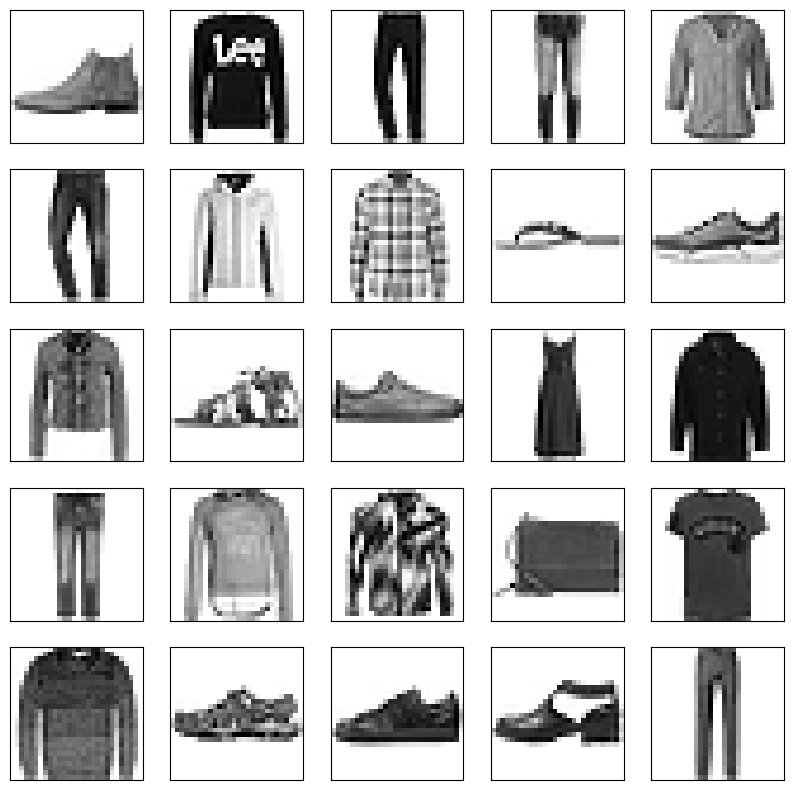

In [ ]:
## 30 görüntüyü görselleştirelim

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary) #bu sefer siyah-beyaz olarak gösterilecek
plt.show()

### 4. Makine Öğrenmesi Modeli Oluşturma

X_train.shape[0] ifadesi, X_train veri kümesinde kaç adet örnek bulunduğunu (satır sayısını) döndürür.

In [ ]:
X_train.shape[0]

60000

X_train ve X_test veri kümelerindeki her bir örneği (görüntüyü) düzleştirir, yani tek bir vektör haline getirir.
Yeni şekiller, her bir örneğin toplam piksel sayısını içeren tek boyutlu vektörler olur. (-1'den dolayı)

In [ ]:
# Verileri 28x28 görüntü formatından 784 özellikli vektörlere düzleştirelim
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
## X_train.shape[0] veri setindeki örnek sayısı,
# Makine Öğrenmesi modelleri verileri tek boyutlu vektörler olarak alır. 28*28 boyutundaki görüntü 784 özellikli vektöre dönüştürülür. (28*28=784)
# Burdaki -1 kalan boyutu otomotik olarak hesaplar, istersek şu şekilde yapabilirdik; (ikisi aynı sonucu verir)

#X_train = X_train.reshape(X_train.shape[0], 28 * 28)
# X_train.reshape(60000,784)
#X_test = X_test.reshape(X_test.shape[0], 28 * 28)


KNN hakkında bu kod ile bilgi alabilirsiniz

In [ ]:
#?KNeighborsClassifier

Bu kod satırı, varsayılan parametrelerle bir KNeighborsClassifier nesnesi oluşturur. Varsayılan olarak, bu sınıflandırıcı k=5 komşuyu kullanır.

.fit() yöntemi, bir modeli eğitmek için kullanılır.

In [ ]:
## KNN modeli

knn=KNeighborsClassifier().fit(X_train,y_train)

In [ ]:
# Test veri kümesi üzerinde modelin tahminlerini yap
y_pred = knn.predict(X_test)

# Doğruluk (accuracy) skorunu hesapla (doğru değerler/tahminleme sayısı)
acc = accuracy_score(y_test, y_pred)

# F1 puanını hesapla. F1 puanı, doğruluk ve hatırlama
 #(recall) metriklerinin harmonik ortalamasıdır.
f1 = f1_score(y_test, y_pred, average='weighted')

# Hatırlama (recall) skorunu hesapla.
#Hatırlama, doğru tahmin edilen pozitif örneklerin toplam pozitif örnek sayısına oranıdır.
recall = recall_score(y_test, y_pred, average='weighted')

# Hassasiyet (precision) skorunu hesapla.
#Hassasiyet, doğru tahmin edilen pozitif örneklerin toplam tahmin edilen pozitif örnek sayısına oranıdır.
precision = precision_score(y_test, y_pred, average='weighted')


Doğruluk (accuracy) skorunu hesapla (doğru değerler/tahminleme sayısı)

In [ ]:
acc

0.8554

F1 puanını hesapla. F1 puanı, doğruluk ve hatırlama (recall) metriklerinin harmonik ortalamasıdır.

In [ ]:
f1

0.8546439722018904

Recall değerini yazdıracağız. Recall değeri pozitif olarak doğru tahmin edilen değerlerin sayısının, pozitif olarak tahmin edilen tüm örneklere oranıdır.

In [ ]:
recall

0.8554

Hassasiyet (precision) skorunu hesapla. Hassasiyet, pozitif olarak tahmin edilen doğru değerlerin sayısının, tüm doğru değerlere oranının bulunmasıyla ortaya çıkar. Tahmin edemediğimiz ve aslında doğru olan önermeler de (FN) işin içine girer.


In [ ]:
precision

0.8578152450755355

### Confusion Matrix oluşturuyoruz.

__cm:__ Gerçek ve tahmin edilen sınıflar arasındaki ilişkiyi gösterir.
__Satırlar:__ Gerçek sınıflar.

__Sütunlar:__ Tahmin edilen sınıflar.
Karmaşıklık matrisi, modelin sınıflandırma performansını değerlendirmenize yardımcı olur.
Örneğin:

__cm[i, j]__ değeri, gerçek sınıf i olan örneklerin model tarafından j olarak tahmin edildiği sayıyı gösterir.

In [ ]:
# Karmaşıklık matrisi

cm = confusion_matrix(y_test, y_pred)
cm


array([[855,   1,  17,  16,   3,   1, 100,   1,   6,   0],
       [  8, 968,   4,  12,   4,   0,   3,   0,   1,   0],
       [ 24,   2, 819,  11,  75,   0,  69,   0,   0,   0],
       [ 41,   8,  15, 860,  39,   0,  34,   0,   3,   0],
       [  2,   1, 126,  26, 773,   0,  71,   0,   1,   0],
       [  1,   0,   0,   0,   0, 822,   5,  96,   1,  75],
       [176,   1, 132,  23,  80,   0, 575,   0,  13,   0],
       [  0,   0,   0,   0,   0,   3,   0, 961,   0,  36],
       [  2,   0,  10,   4,   7,   0,  16,   7, 953,   1],
       [  0,   0,   0,   0,   0,   2,   1,  29,   0, 968]])

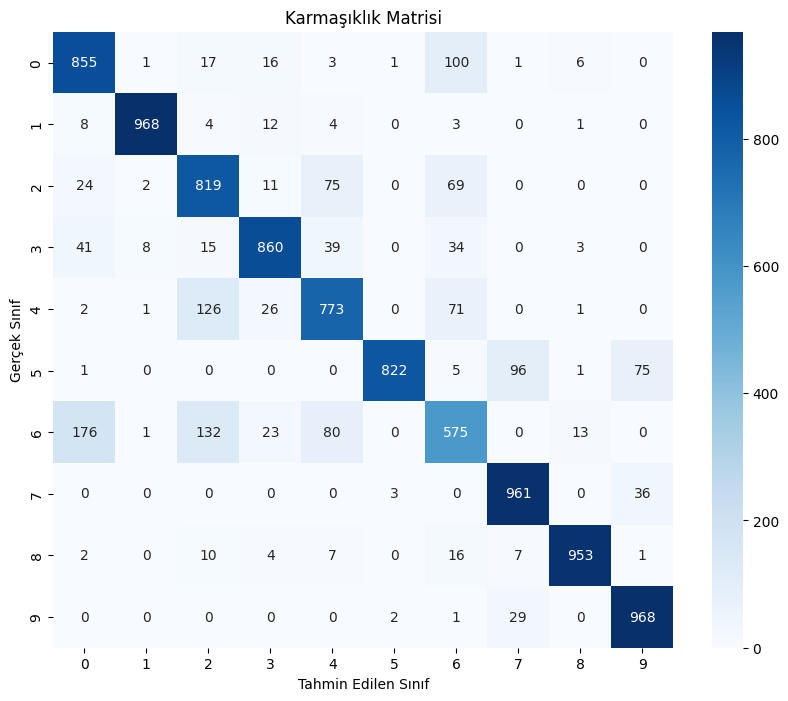

In [ ]:
# görselleştirelim
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

### Random Forest oluştur

- Random Forest modelini oluştururken RandomForestClassifier sınıfını kullanıyoruz. n_estimators=100 parametresiyle 100 ağaçtan oluşan bir Random Forest modeli oluşturuyoruz. max_depth=5 parametresiyle her bir ağacın maksimum derinliğini 5 olarak belirliyoruz. random_state=0 parametresi ise modelin tekrarlanabilirliğini sağlamak için kullanılır, yani aynı kod her çalıştırıldığında aynı sonucu verir.
- model.score fonksiyonu, bir modelin doğruluğunu değerlendirmek için kullanılır. Genellikle sınıflandırma modelleri için kullanılır ve modelin doğru tahmin ettiği veri noktalarının oranını verir.



In [ ]:
# Verileri yeniden şekillendirme
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Random Forest modelini oluşturun
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)

# Modeli eğitin
model.fit(X_train_reshaped, y_train)

# Modeli test edin ve performansı değerlendirin
y_pred = model.predict(X_test_reshaped)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')


Doğruluk (Accuracy): 0.8554
F1 Skoru: 0.7414
Geri Çağırma (Recall): 0.7629
Kesinlik (Precision): 0.7785


In [ ]:
# Karmaşıklık matrisi

cm = confusion_matrix(y_test, y_pred)
cm



array([[776,   0,  48, 130,   8,   1,  16,   0,  21,   0],
       [  1, 852,  19, 120,   3,   0,   3,   0,   2,   0],
       [  9,   0, 708,  12, 259,   0,   5,   0,   7,   0],
       [ 24,   4,  41, 884,  34,   0,   8,   0,   5,   0],
       [  0,   2, 158,  88, 742,   1,   4,   0,   5,   0],
       [  0,   0,   0,   3,   0, 844,   0,  98,   7,  48],
       [212,   2, 212, 125, 338,   1,  80,   0,  30,   0],
       [  0,   0,   0,   0,   0,  11,   0, 898,   0,  91],
       [  2,   2,  43,  21,   4,   3,   1,   6, 917,   1],
       [  0,   0,   2,   0,   0,   9,   0,  58,   3, 928]])

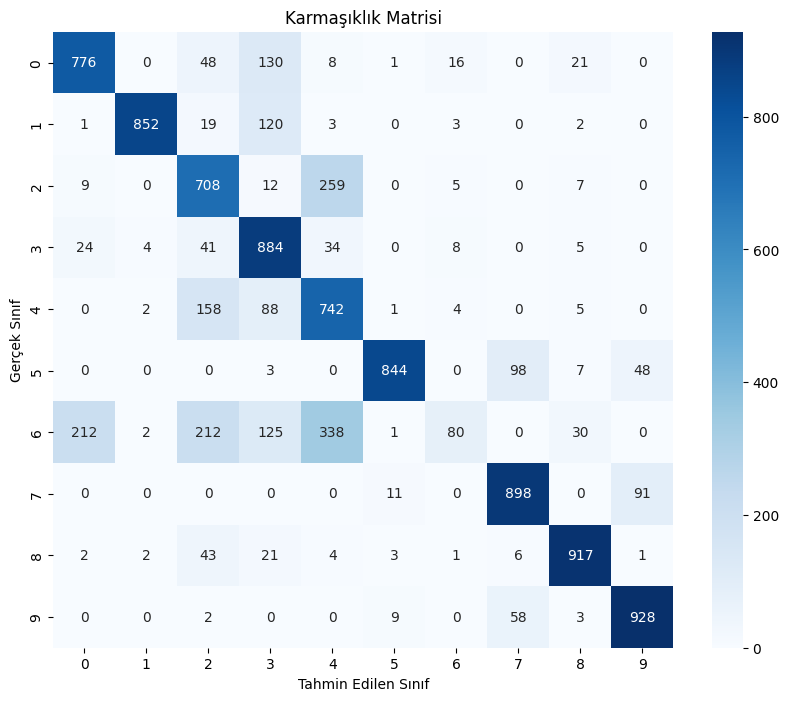

In [ ]:
# görselleştirelim
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

### Karar Ağacı oluştur

Karar ağacı oluştururken şu adımlar izlenir:

 - Kök Düğüm (Root Node): Karar ağacının başlangıç noktasıdır. Kök düğümde, veri setindeki tüm özelliklerin değerleri kullanılır.

 - Dallanma (Splitting): Kök düğümden başlayarak, her düğümde veri seti belirli bir özellik ve bu özelliğin değerleri ile bölünür. Bu bölünme işlemi, veri setini homojen alt gruplara ayırmayı amaçlar.

 - Yaprak Düğümler (Leaf Nodes): Dallanma işlemi sonucunda elde edilen homojen alt gruplar, yaprak düğümlerde sonuçlarını verir. Bu sonuçlar, sınıflandırma problemlerinde bir sınıfa ait olma olasılığı veya regresyon problemlerinde bir değer olabilir.

 - Dallanma Kriterleri (Splitting Criteria): Karar ağacı oluşturulurken, her düğümde bölünmenin nasıl yapılacağını belirlemek için dallanma kriterleri kullanılır. Genellikle kullanılan kriterler şunlardır:

    - Gini impurity: Veri setinin homojenliğini ölçer.
    -Entropi: Veri setinin düzensizliğini ölçer.
    - Hata Oranı (Misclassification Error): Yanlış sınıflandırılan örneklerin oranını ölçer.

- Ağaç Oluşturma ve Kesme Kriterleri: Ağaç oluşturma işlemi, dallanma kriterlerine ve belirlenen kesme kriterlerine göre devam eder. Ağaç, belirli bir derinliğe ulaştığında veya belirli bir düğümde bölünme yapılamayacak duruma geldiğinde kesilir.

- Bu örnekte, test_size=0.2 ile veri setinin %20'sinin test verisi olarak ayrılacağı belirtilmiş ve random_state=42 ile de rastgele bölünme işlemi için başlangıç noktası belirlenmiştir. Bu şekilde, her çalıştırmada aynı veri seti bölünmesi gerçekleşecektir.
- Karar ağaçları, veri özelliklerinin farklı ölçeklerde olmasından etkilenmez ve bu nedenle normalizasyon veya standartlaştırma gerektirmez.

In [ ]:
# Iris veri setini yükle
iris = load_iris()
X = iris.data
y = iris.target

# Eğitim ve test veri setlerini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Karar ağacı modelini oluştur
model = DecisionTreeClassifier(max_depth=2, min_samples_split=4, min_samples_leaf=2)

# Modeli eğit
model.fit(X_train, y_train)

# Test veri seti üzerinde modeli değerlendir
y_pred = model.predict(X_test)

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.9667
F1 Skoru: 0.9664
Geri Çağırma (Recall): 0.9667
Kesinlik (Precision): 0.9694


Overfitting sorununu azaltmak için, karar ağacını budayabilir veya modelin karmaşıklığını kontrol edebilirsiniz. Bu örnekte, max_depth=2 ile karar ağacının maksimum derinliğini 2 olarak sınırlandırdık.

###Destek Vektör Makineleri (SVM) Modeli

- Iris veri setini yüklemiştik.
- Eğitim ve test veri setlerini ayrı ayrı yüklemiştik.
- Şimdi de iki sınıf arasında bir hiperdüzlem çizerek, bu hiperdüzlemin her iki tarafındaki destek vektörlerini maksimize edeceğiz. Destek vektörlerimiz, hiperdüzleme en yakın olan veri noktalarıdır.
-  SVC sınıfını kullanarak bir SVM modeli oluşturuyoruz. kernel parametresi ile kernel tipini (linear, rbf, poly, sigmoid gibi) ve C parametresi ile düzenleme parametresini belirliyoruz.
- SVM modeli eğitiyoruz
- Test veri seti üzerinde değerlendirerek doğruluk skorunu hesaplıyoruz.

In [ ]:
# Veriyi standartlaştır, normalleştir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Destek Vektör Makinesi (SVC) modelini oluştur
model = SVC(kernel='linear', C=1.0)
# kernel parametresi, kullanılan kernel tipini belirtir (linear, rbf, poly, sigmoid gibi)
# C parametresi, düzenleme parametresidir ve aşırı uydurmaya karşı hassasiyeti kontrol eder

# Modeli eğit
model.fit(X_train, y_train)

# Test veri seti üzerinde modeli değerlendir
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Doğruluk (Accuracy): {accuracy:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.9667
F1 Skoru: 0.9664
Geri Çağırma (Recall): 0.9667
Kesinlik (Precision): 0.9694


### ÖDEV: Diğer Makine öğrenmesi modelleri için uygulama yapınız

## LightGBM Modeli

- Şimdi de LightGBM modelini kullanacağız.

- Fashion MNIST, LightGBM gibi Gradient Boosting algoritmalarıyla uyumlu bir veri kümesidir çünkü:

 - Orta ölçekli bir veri kümesidir, bu da LightGBM gibi hızlı ve yüksek performanslı modellerin işlemesi için idealdir.
 - Düşük boyutlu siyah-beyaz görüntüler içerir, bu da bellek kullanımını azaltır ve işlem hızını artırır.
 - Sınıflandırma için etiketlenmiş veriye sahiptir, bu da LightGBM gibi denetimli öğrenme algoritmalarıyla uyumlu olduğunu gösterir.

 Bu nedenlerden dolayı, Fashion MNIST veri kümesi LightGBM gibi hızlı ve etkili modellerin geliştirilmesi ve test edilmesi için uygun bir seçimdir.






In [ ]:
# Fashion MNIST veri setini yükleyin
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Veriyi düzleştirin (28x28 görüntüleri 784 uzunluğunda bir vektöre dönüştürün)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Veriyi normalize edin (0-255 aralığındaki piksel değerlerini 0-1 aralığına dönüştürün)
X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

# LightGBM modelini oluşturun ve eğitin
train_data = lgb.Dataset(X_train_flat, label=y_train)
params = {
    'objective': 'multiclass',
    'num_class': 10,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'random_state': 42
}
model = lgb.train(params, train_data, num_boost_round=100)

# Test seti üzerinde modelin performansını değerlendirin
y_pred = model.predict(X_test_flat)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_labels)
print(f'Doğruluk (Accuracy): {accuracy:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

# Yeni veri noktaları için tahminler yapın
new_data = X_test_flat[:2]
predictions = model.predict(new_data)
predicted_labels = np.argmax(predictions, axis=1)
print("Yeni veri noktaları için tahminler:")
for i, prediction in enumerate(predicted_labels):
    print(f"Veri {i+1}: {prediction}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.582587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 170881
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 783
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
Doğruluk (Accuracy): 0.8941
F1 Skoru: 0.9664
Geri Çağırma (Recall): 0.9667
Kesinlik (Precision): 0.9694
Yeni veri noktaları için tahminler:
Veri 1: 9
Veri 2: 2


## 5. YSA ile Model Eğitimi

In [ ]:
mnist=tf.keras.datasets.mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# veri normalleştirme
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

 - Sondaki '1' kanal sayısını belirtir. Gri tonlamalı görüntülerde kanal sayısı 1'dir. Renkli görüntülerde bu değer genellikle 3 (RGB kanalları için) olur.
 - Dizinin veri tipi, float32 olarak ayarlanır. Burada 64 bitlik bellek alanı yerine 32 bit kullanılarak matematiksel işlemlerin doğruluğunu ve performansını artırılır.


In [ ]:
# burdaki -1 yine otomotik olarak uygun değeri belirliyor -1 yerine direk örnek sayısını yazabilirsiniz ör:60000 veya X_train.shape[0], X_test.shape[0]
# 28*28 boyutlu 1 kanalı görüntüye çevirdik (gray), ayrıca veri tipini float32 yapıp normalize ettik
# şu kodda aynı sonucu verir;

#X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
#X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0


In [ ]:
X_train.shape[0]

60000

In [ ]:
## classlar için one hot encoding işlemi yapalım


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


 - One-hot encoding, sınıf etiketlerini 0 ve 1'lerden oluşan çok boyutlu vektörlere dönüştürme işlemidir. Her sınıf etiketi, sınıf sayısı kadar boyuta sahip bir vektörde, ilgili sınıfın indeksine karşılık gelen değeri 1, diğer tüm değerleri 0 yapar. Bu işlem, kategorik verilerin makine öğrenimi modelleri için sayısal verilere dönüştürülmesini sağlar.



#ÖDEV: KATMAN SAYISINI DEĞİŞTİR.

Bu modeli daha iyi anlamak için açıklamalar:

 - __Flatten__: Giriş verilerini düzleştirir, 28x28 boyutundaki veriyi 784 boyutunda bir vektöre dönüştürür.
 - __Dense (4 nöron, ReLU):__ İlk gizli katman, 4 nöron içerir ve ReLU aktivasyon fonksiyonu kullanır. ReLU, öğrenme kapasitesini artırırken hesaplama verimliliği sağlar.
 - __Dense (6 nöron, ReLU):__ İkinci gizli katman, daha fazla nöron içerir (6 nöron). Bu katman, daha karmaşık özellikleri öğrenmeyi sağlar.
 - __Dense (8 nöron, ReLU):__ Üçüncü gizli katman, 8 nöron içerir ve modelin daha derin özellikler öğrenmesine yardımcı olur.
 - __Dense (10 nöron, Softmax):__ Çıkış katmanı, 10 sınıfa ait olasılık dağılımı verir. Softmax aktivasyonu, sınıflandırma problemleri için uygundur.



In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    #tf.keras.layers.Droupout(0.5),
    tf.keras.layers.Dense(6, activation='relu'),
    #tf.keras.layers.Droupout(0.2),
    tf.keras.layers.Dense(8, activation='relu'),
    #tf.keras.layers.Droupout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 6)                 30        
                                                                 
 dense_2 (Dense)             (None, 8)                 56        
                                                                 
 dense_3 (Dense)             (None, 10)                90        
                                                                 
Total params: 3316 (12.95 KB)
Trainable params: 3316 (12.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

Bu kod bloğunda, sinir ağı modelinin derlenmesi (compile) işlemi yapılmaktadır. Model derlenirken, optimizasyon algoritması, kayıp fonksiyonu ve izlenecek değerlendirme metrikleri belirlenir. Böylece model veriyi en iyi şekilde öğrenebilir ve genel performansını artırabilir.

#Epoch sayısı artarsa daha başarılı sonuçlar verecektir.

Bu kod, modelin eğitim sürecini başlatır. Model, X_train ve y_train verileri üzerinde eğitim yapılırken X_test ve y_test verileri üzerinde doğrulama (validation) yapılır. Eğitim süreci 10 epoch boyunca sürdürülür. Bir epoch, modelin tüm eğitim verilerini bir kez görmesi demektir.

 - Bu grafikte, modelin eğitim ve doğrulama verisi üzerindeki kayıp değerlerinin epoch'lar boyunca nasıl değiştiği gösterilmektedir.
 - Eğitim ve doğrulama kayıplarının zamanla azaldığını gözlemlemek, modelin öğrenme sürecini ve performansını değerlendirmek için önemlidir.

__loss:__ Eğitim verisi üzerindeki kayıp değeri.

__accuracy:__ Eğitim verisi üzerindeki doğruluk.

__val_loss:__ Doğrulama verisi üzerindeki kayıp değeri.

__val_accuracy:__ Doğrulama verisi üzerindeki doğruluk.

 Modelimizde eğitim kaybının ve doğrulama kaybının sürekli olarak düşmesi ve doğrulama doğruluğunun artması modelin doğru bir şekilde öğrenme yaptığını gösteriyor.

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1426 - accuracy: 0.6140 - val_loss: 0.6906 - val_accuracy: 0.7760
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6238 - accuracy: 0.8125 - val_loss: 0.5767 - val_accuracy: 0.8275
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5636 - accuracy: 0.8328 - val_loss: 0.5401 - val_accuracy: 0.8420
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5333 - accuracy: 0.8423 - val_loss: 0.5210 - val_accuracy: 0.8472
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5091 - accuracy: 0.8517 - val_loss: 0.4985 - val_accuracy: 0.8521
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4933 - accuracy: 0.8571 - val_loss: 0.4953 - val_accuracy: 0.8561
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4820 - accuracy: 0.8601 - val_loss: 0.4808 - val_accuracy:

## Modelin Eğitim ve Doğrulama Kayıpları Grafiği

- Bu grafikte, modelin eğitim ve doğrulama verisi üzerindeki kayıp değerlerinin epoch'lar boyunca nasıl değiştiği gösterilmektedir.
- Eğitim ve doğrulama kayıplarının zamanla azaldığını gözlemlemek, modelin öğrenme sürecini ve performansını değerlendirmek için önemlidir.

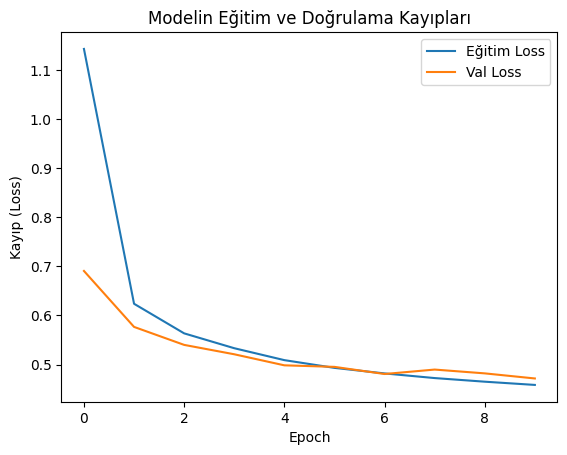

In [ ]:
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Modelin Eğitim ve Doğrulama Kayıpları")
plt.xlabel("Epoch")
plt.ylabel("Kayıp (Loss)")
plt.show()


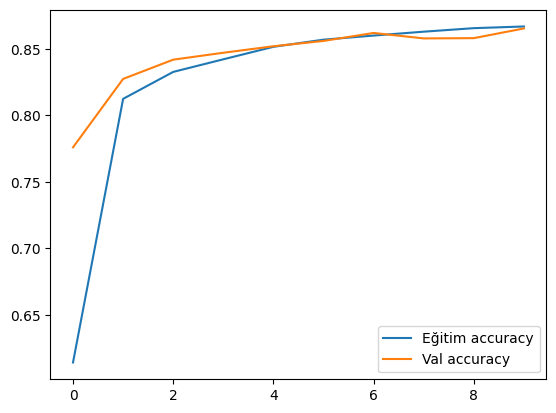

In [ ]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim accuracy")
plt.plot(hist.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

Bu kod, modeli Adam optimizasyon algoritması ve kategorik çapraz entropi kaybı kullanarak derler. Ayrıca, modelin performansını değerlendirmek için doğruluk (accuracy), kesinlik (precision), geri çağırma (recall) ve F1 skoru metriklerini kullanır. Bu metrikler, modelin eğitim ve doğrulama süreçlerindeki performansını ölçmek için kullanılır.


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.F1Score()])


In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4557 - accuracy: 0.8683 - precision: 0.8954 - recall: 0.8430 - f1_score: 0.8666 - val_loss: 0.4653 - val_accuracy: 0.8663 - val_precision: 0.8922 - val_recall: 0.8396 - val_f1_score: 0.8646
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4504 - accuracy: 0.8692 - precision: 0.8966 - recall: 0.8443 - f1_score: 0.8676 - val_loss: 0.4640 - val_accuracy: 0.8654 - val_precision: 0.8890 - val_recall: 0.8405 - val_f1_score: 0.8636
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4474 - accuracy: 0.8702 - precision: 0.8965 - recall: 0.8454 - f1_score: 0.8685 - val_loss: 0.4701 - val_accuracy: 0.8657 - val_precision: 0.8913 - val_recall: 0.8402 - val_f1_score: 0.8640
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4437 - accuracy: 0.8703 - precision: 0.8974 - recall: 0.8464 - f1_score: 0.8686 - val_loss: 0.4773 - val_accuracy: 0.8

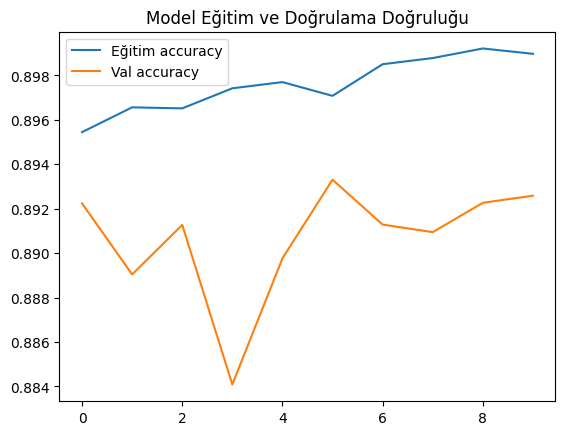

In [ ]:
# Yeni bir şekil oluşturur
plt.figure()

# Eğitim veri setindeki doğruluk oranını (precision) çizer
plt.plot(hist.history["precision"], label="Eğitim accuracy")

# Doğrulama veri setindeki doğruluk oranını (precision) çizer
plt.plot(hist.history["val_precision"], label="Val accuracy")

# Grafiğe bir efsane (legend) ekler, bu sayede hangi eğrinin neyi temsil ettiğini görürüz
plt.legend()

# Grafiğe başlık ekler
plt.title("Model Eğitim ve Doğrulama Doğruluğu")

# Grafiği ekranda gösterir
plt.show()


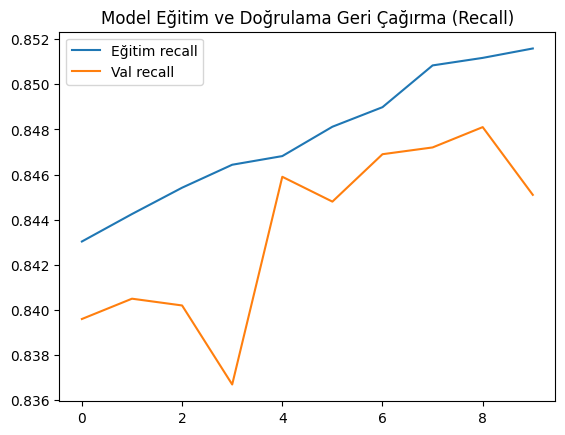

In [ ]:
# Yeni bir şekil oluşturur
plt.figure()

# Eğitim veri setindeki geri çağırma oranını (recall) çizer
plt.plot(hist.history["recall"], label="Eğitim recall")

# Doğrulama veri setindeki geri çağırma oranını (recall) çizer
plt.plot(hist.history["val_recall"], label="Val recall")

# Grafiğe bir efsane (legend) ekler, bu sayede hangi eğrinin neyi temsil ettiğini görürüz
plt.legend()

# Grafiğe başlık ekler
plt.title("Model Eğitim ve Doğrulama Geri Çağırma (Recall)")

# Grafiği ekranda gösterir
plt.show()


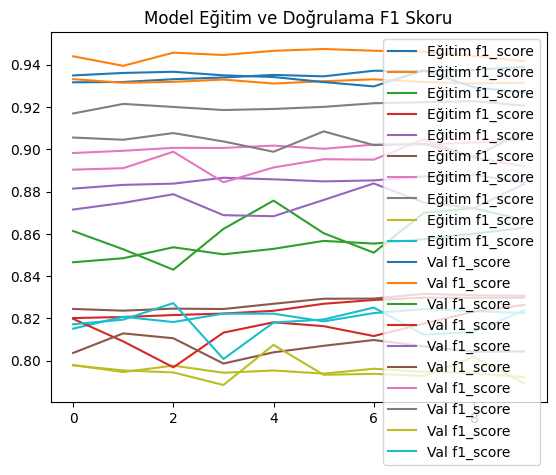

In [ ]:
# Yeni bir şekil oluşturur
plt.figure()

# Eğitim veri setindeki F1 skorunu çizer
plt.plot(hist.history["f1_score"], label="Eğitim f1_score")

# Doğrulama veri setindeki F1 skorunu çizer
plt.plot(hist.history["val_f1_score"], label="Val f1_score")

# Grafiğe bir efsane (legend) ekler, bu sayede hangi eğrinin neyi temsil ettiğini görürüz
plt.legend()

# Grafiğe başlık ekler
plt.title("Model Eğitim ve Doğrulama F1 Skoru")

# Grafiği ekranda gösterir
plt.show()


### Convolutional Neural Networks

### CNN Modeli Oluşturalım


### Katman Açıklamaları:

**Conv2D:** 2D evrişim katmanı, görüntülerden özellikler çıkarır.

**Dense:** Tam bağlı katman, her nöron tüm girişlerle bağlantılıdır.

**Flatten:** Çok boyutlu girdileri tek boyutlu vektöre dönüştürür.

**Concatenate:** Tensörleri belirtilen eksende birleştirir.

**GlobalMaxPooling2D:** Her özellik haritasının maksimum değerini alır.

**MaxPooling2D:** Özellik haritalarını aşağı örnekler, maksimum değeri alır.

**GlobalAveragePooling2D:** Her özellik haritasının ortalama değerini alır.

**AveragePooling2D:** Özellik haritalarını aşağı örnekler, ortalama değeri alır.

**Dropout:** Belirli bir oranda nöronları rastgele devre dışı bırakır, aşırı öğrenmeyi önler.


In [ ]:

from tensorflow.keras.layers import Conv2D, Dense, Flatten, \
                                    Concatenate, GlobalMaxPooling2D, \
                                    MaxPooling2D, GlobalAveragePooling2D, \
                                    AveragePooling2D,Dropout


In [ ]:
model=tf.keras.Sequential([
        tf.keras.layers.InputLayer((28,28,1)),
        # Rescaling Katmanı: Piksel değerlerini 0-255 aralığından 0-1 aralığına yeniden ölçekler.
        tf.keras.layers.Rescaling(1/255.0),

        # Conv2D: 8 filtreli, 3x3 boyutunda çekirdekler, ReLU aktivasyon fonksiyonu.
        Conv2D(8,3,activation="relu"),

        # MaxPooling2D: 2x2 boyutunda havuzlama penceresi.
        MaxPooling2D((2, 2)),

        Conv2D(16,3,activation="relu"),
        MaxPooling2D((2,2)),

        # Flatten: Çok boyutlu veriyi tek boyutlu vektöre dönüştürür.
        Flatten(),


        Dense(10,activation="softmax")
    ])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 400)              

In [ ]:
#Bu kod parçası modeli kategorik sınıflandırma için uygun hale getirir
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 1.0266 - accuracy: 0.6956 - val_loss: 0.4530 - val_accuracy: 0.8665
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4018 - accuracy: 0.8796 - val_loss: 0.3382 - val_accuracy: 0.9005
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3248 - accuracy: 0.9035 - val_loss: 0.2775 - val_accuracy: 0.9157
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2702 - accuracy: 0.9194 - val_loss: 0.2316 - val_accuracy: 0.9314
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2261 - accuracy: 0.9323 - val_loss: 0.1956 - val_accuracy: 0.9419
Epoch 6/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1927 - accuracy: 0.9419 - val_loss: 0.1650 - val_accuracy: 0.9521
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1684 - accuracy: 0.9491 - val_loss: 0.1458 -

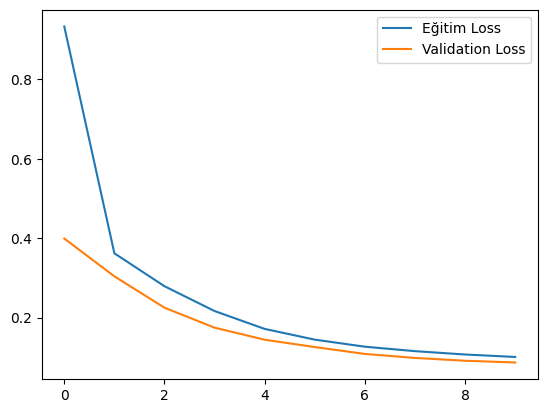

In [ ]:
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()



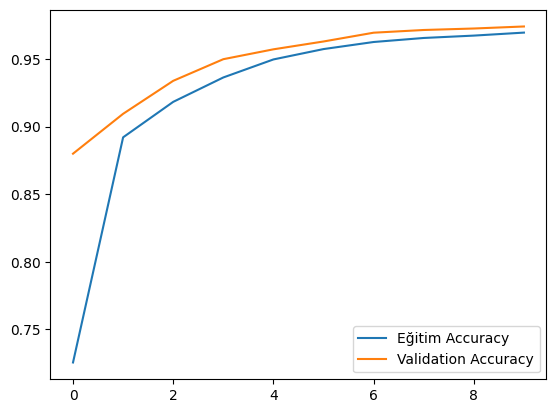

In [ ]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim Accuracy")
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
# diğer metrikleri denemeye çalşın
print(f'Doğruluk (Accuracy): {accuracy:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.8941
F1 Skoru: 0.9664
Geri Çağırma (Recall): 0.9667
Kesinlik (Precision): 0.9694
